# Illustration plotting: 2D GLL distribution under H- & P-refinement
by JN Hayek

In the current jupyter notebook I intend to plot the GLL quadrature location under h and p refinement

In [2]:
from gll import gll

import matplotlib.pyplot as plt
import matplotlib.collections
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec

In [3]:
plt.rcParams["figure.figsize"] = (8,8)

In [4]:
def PlotMesh(NumLines):
    x, y = np.meshgrid(np.linspace(0,1, NumLines), np.linspace(0, 1, NumLines))

    plt.plot(x, y,color='k') # use plot, not scatter
    segs1 = np.stack((x,y), axis=2)
    plt.gca().add_collection(matplotlib.collections.LineCollection(segs1,color='k'))


def PlotNodesGllToGlobal(NumBasis,dx,x0,y0):
    
    list1 = gll(NumBasis)[0]
    list2 = gll(NumBasis)[0]

    GllNodes=np.array([list(i) for i in list(itertools.product(list1, list2))])
    y = (GllNodes[:,0] + 1)*dx*0.5+x0
    z = (GllNodes[:,1] + 1)*dx*0.5+y0
    plt.plot(y,z, marker="o", ls="", color="crimson")
    
def PlotBasis(NumBasis, dx, x0es):
    xyes = [list(i) for i in list(itertools.product(x0es, x0es))]
    for x in xyes:
        PlotNodesGllToGlobal(NumBasis,dx,x[0],x[1])
        

def PlotCell_and_GLL_Points(NumCells,NumBasis):
    NumLines=NumCells+1
    
    PlotMesh(NumLines)

    x0es = list(np.linspace(0,1, NumLines))[:-1]
    dx = list(np.linspace(0,1, NumLines))[1]
    
    PlotBasis(NumBasis=NumBasis, dx=dx, x0es=x0es)
    
    plt.gca().set_aspect('equal')
    plt.axis('off')



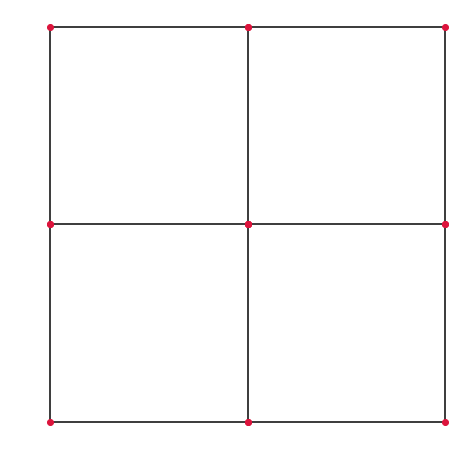

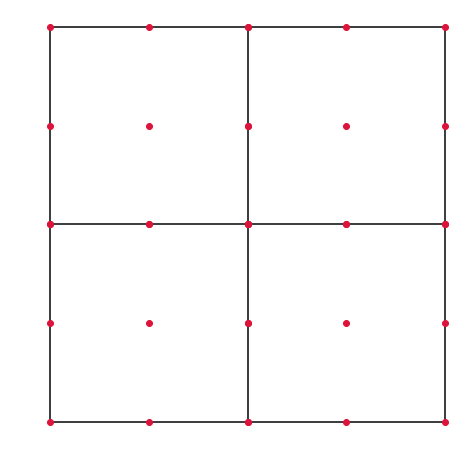

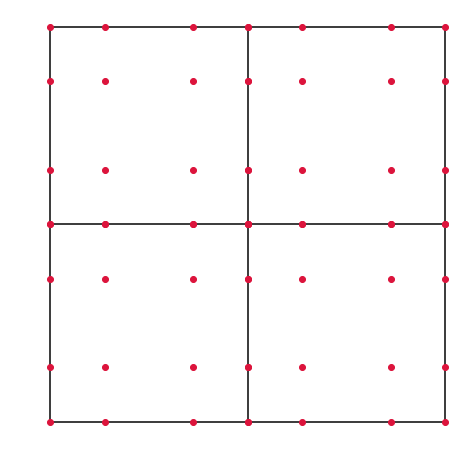

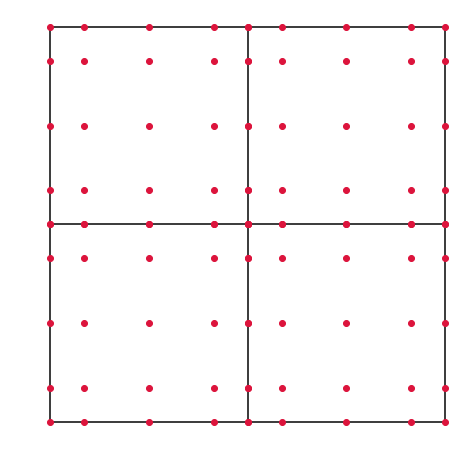

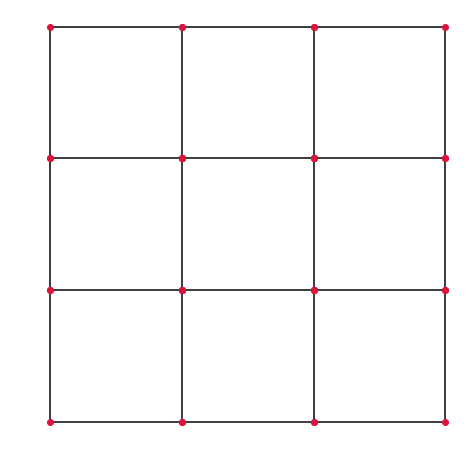

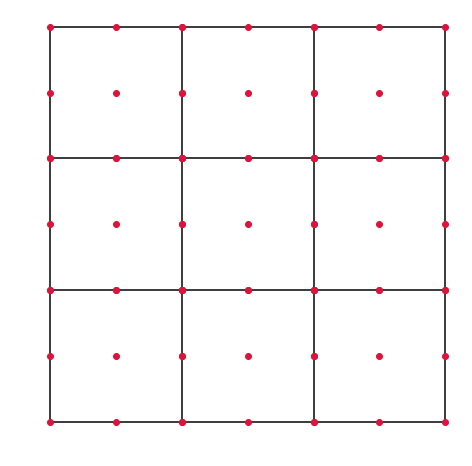

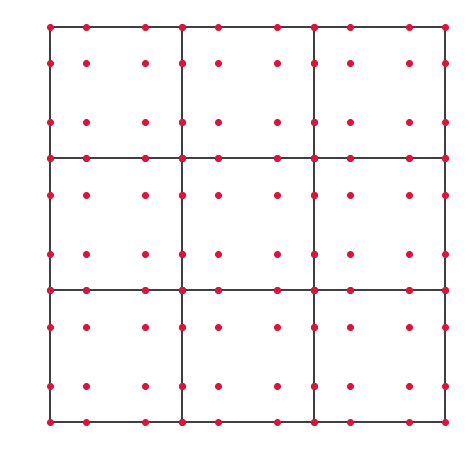

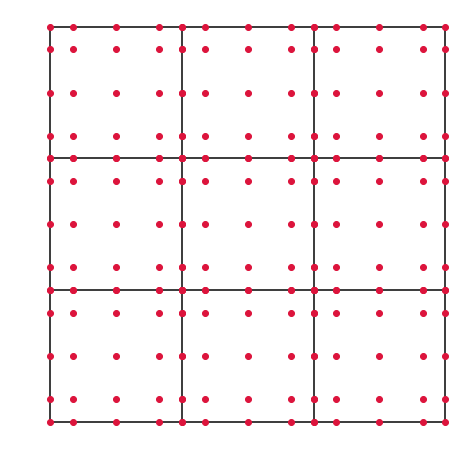

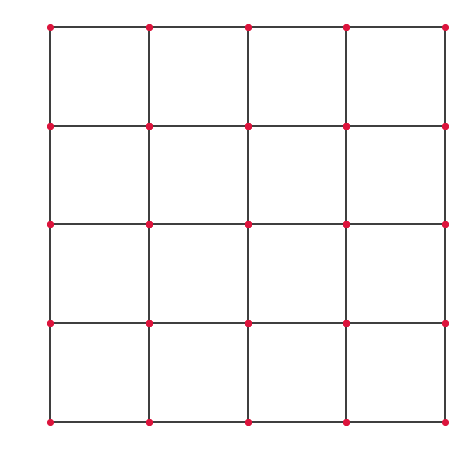

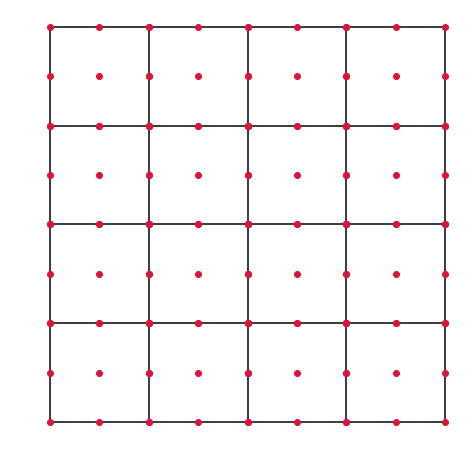

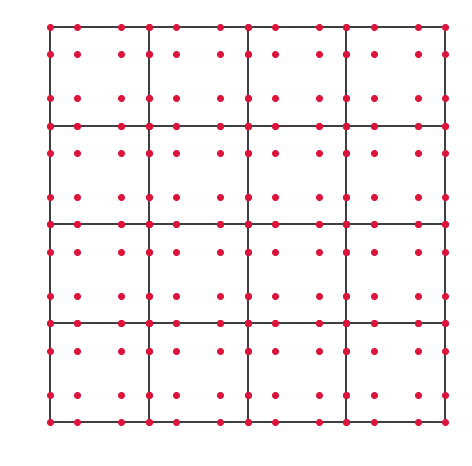

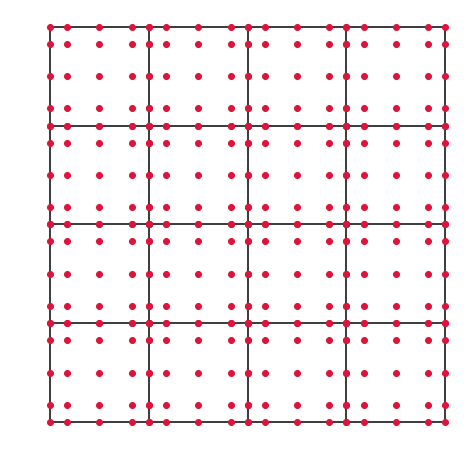

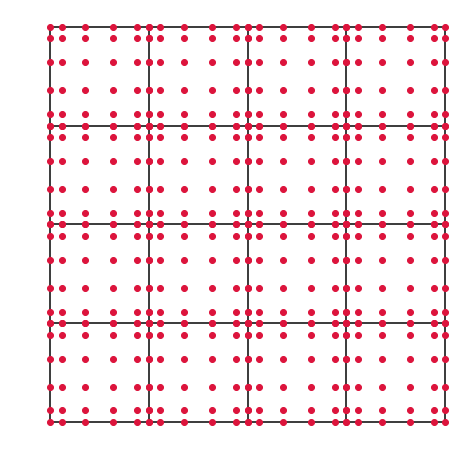

In [5]:

PlotCell_and_GLL_Points(NumCells=2,NumBasis=1);plt.show()
PlotCell_and_GLL_Points(NumCells=2,NumBasis=2);plt.show()
PlotCell_and_GLL_Points(NumCells=2,NumBasis=3);plt.show()
PlotCell_and_GLL_Points(NumCells=2,NumBasis=4);plt.show()
PlotCell_and_GLL_Points(NumCells=3,NumBasis=1);plt.show()
PlotCell_and_GLL_Points(NumCells=3,NumBasis=2);plt.show()
PlotCell_and_GLL_Points(NumCells=3,NumBasis=3);plt.show()
PlotCell_and_GLL_Points(NumCells=3,NumBasis=4);plt.show()
PlotCell_and_GLL_Points(NumCells=4,NumBasis=1);plt.show()
PlotCell_and_GLL_Points(NumCells=4,NumBasis=2);plt.show()
PlotCell_and_GLL_Points(NumCells=4,NumBasis=3);plt.show()
PlotCell_and_GLL_Points(NumCells=4,NumBasis=4);plt.show()
PlotCell_and_GLL_Points(NumCells=4,NumBasis=5);plt.show()

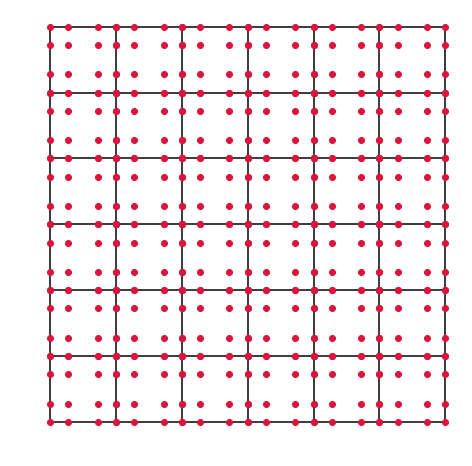

In [6]:
PlotCell_and_GLL_Points(NumCells=6,NumBasis=3)
plt.savefig("/home/nico/Desktop/schematics/GLL_Field.svg")